<a href="https://colab.research.google.com/github/eniangnsa/hello-world/blob/main/us_accident_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accident-data-analysis')
jovian.set_colab_id('1kf0SEMlLoTGUxo6IFIvYMn9OVaeSZKkb')

# us-accident-data-analysis

Use the "Run" button to execute the code.

## US ACCIDENT EXPLORATORY DATA ANALYSIS

## download the data

In [5]:
pip install opendatasets --upgrade --quiet


In [6]:
import opendatasets as od
download_url = "https://www.kaggle.com/sobhanmoosavi/us-accidents"
od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [7]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

## data preparation and cleaning
1. import pandas and load the data
2. check for missing values or incorrect ones and deal with them
3. look for specific information about the data

In [8]:
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv(data_filename)

In [10]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [11]:
# say i want to find out how many columns it has
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
df.describe()
# this gives me a brief general statistics about my dataset with the five point summary.
# note this only applies to the numeric columns

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

 from the result above, i can see that some columns contain missing values. 
 this obviously has to be dealt with.

In [14]:
len(df.columns)
# this counts the number of columns we have in our dataframe

47

In [15]:
# to check the number of rows
len(df)

1516064

In [16]:
# how to check for how many numeric columns we have
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

In [17]:
# now it's time for us to check for missing values.
df.isnull().sum().sort_values(ascending = False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
City                          83
Nautical_Twilight             83
Astronomical_Twilight         83
Civil_Twilight                83
Sunrise_Sunset                83
Amenity                        0
Bump                           0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Street    

In [18]:
# suppose i want to report it as percentages instead
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
Amenity                   0.000000
Bump                      0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)        

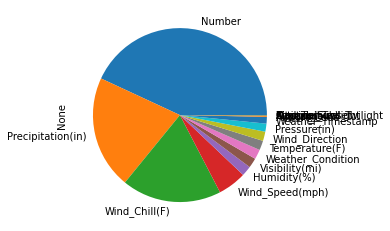

In [19]:
missing_percentage.plot(kind = "pie")

In [20]:
# my plot is kind of messy. i would love to get rid of the columns where there is no missing values.
# to do that, i'll have to filter for that condition.
new_missing_percentage = missing_percentage[missing_percentage != 0]
new_missing_percentage

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
dtype: float64

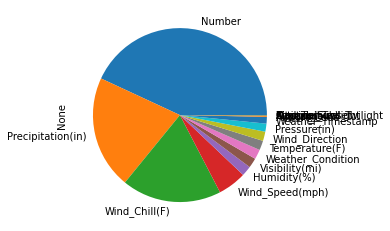

In [21]:
# based on what i did initially, i can now do a plot to see the distribution of my missing values
new_missing_percentage.plot(kind = "pie")

from what we've seen so far, there are cloumns that contain many missing values.
these cloumns are not going to be useful in our analysis as they will not give us accurate information.  so it is a good thing to drop them and work with the once that don't have much missing values

## exploratory analysis and visualization
so now it's time for us to do some exploratory work on our dataset.
first we would love to find out what columns would be necessary for the analysis.
1. City
2.weather_condition
3.Temperature
4.Start_Lang,Start_lng
5.Start_Time

In [22]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [23]:
cities = df.City.unique()
len(cities)

10658

In [24]:
cities[:100]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Batavia', 'Cleveland', 'Lima', 'Westerville', 'Jamestown',
       'Freeport', 'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell',
       'Edinburgh', 'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', '

In [25]:
# now we want to count the number of accidents in top 10 cities.
cities_by_accidents = df.City.value_counts()
cities_by_accidents.head(10)

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

In [26]:
# so what if i want to check for accidents with state
len(df.State.value_counts()) # this will show you that you have 49 states in the dataset.
df.State.value_counts()

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

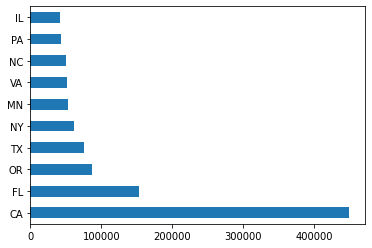

In [27]:
df.State.value_counts().head(10).plot(kind = "barh") # this line of code here shows us the top 10 states with the highest accidents
# CA has the highest number of accidents that exceeds florida by a large margin.
# this call for some form of concern.

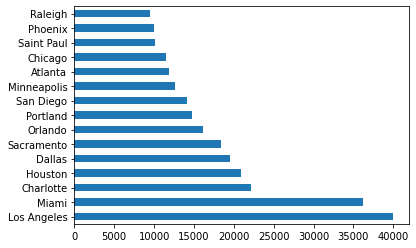

In [28]:
df.City.value_counts().head(15).plot(kind = "barh")

In [29]:
#suppose i want to find out cities that have the least number of accidents
df.City.value_counts().tail(20)

Lewiston Woodville     1
Forest Falls           1
Southern Pines         1
West Dover             1
Fithian                1
Adell                  1
Limerick               1
Weatogue               1
West Brooklyn          1
Mumford                1
Elroy                  1
South Range            1
Enid                   1
Jbsa Ft Sam Houston    1
Mound Bayou            1
Trotwood               1
Coleharbor             1
Beaver City            1
Tornillo               1
Clarendon              1
Name: City, dtype: int64

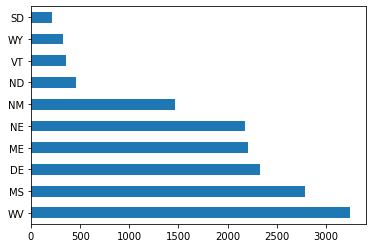

In [30]:
df.State.value_counts().tail(10).plot(kind = "barh") # suppose we're asking the states with the least number of accidents.

In [31]:
import seaborn as sns
sns.set_style("darkgrid")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


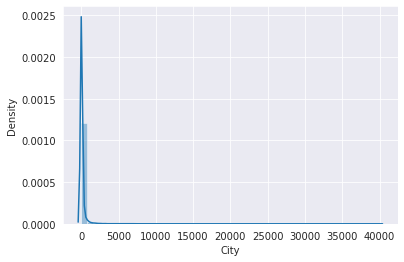

In [32]:
sns.distplot(cities_by_accidents)

In [33]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [34]:
# next i would love to find out how many cities have accidents greater than 1000
len(high_accident_cities)

251

In [35]:
# what if i decided to find the number of cities with low accidents 
len(low_accident_cities)

10406

In [36]:
# also what if i want to find out the percentage of cities low accidents cities to the total
(len(low_accident_cities)/len(cities))*100

97.63557890786264

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


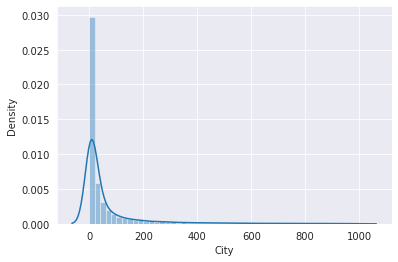

In [37]:
sns.distplot(low_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


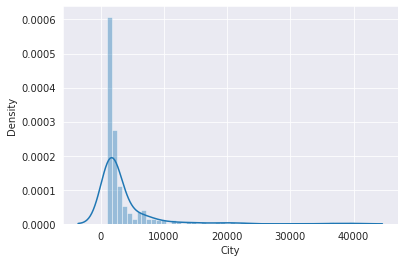

In [38]:
sns.distplot(high_accident_cities)

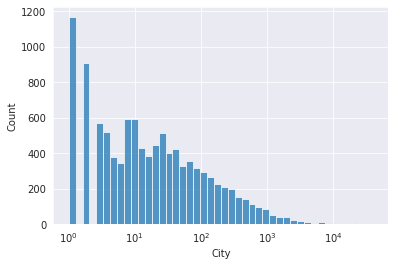

In [39]:
sns.histplot(cities_by_accidents,log_scale= True)

### Start Time 

In [40]:
df.Start_Time.head()
# this code here gives me a sneak peek at what kind of data is contained in my column.
# suprising, it is stored as an object. this could be a string.
# to have an accurate analysis, i might have need of converting it to a date time format.

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
3    2016-02-08 06:15:39
4    2016-02-08 06:51:45
Name: Start_Time, dtype: object

In [41]:
df.Start_Time = pd.to_datetime(df.Start_Time)
# what i did here was to convert the Start_Time column to datetime format and replace it with that in the original DataFrame

In [42]:
df.Start_Time.head()
# this line here is to confirm that the column was converted succesfully and updated.

0   2016-02-08 00:37:08
1   2016-02-08 05:56:20
2   2016-02-08 06:15:39
3   2016-02-08 06:15:39
4   2016-02-08 06:51:45
Name: Start_Time, dtype: datetime64[ns]

In [43]:
# similary, i can also convert the End_Time column to a datetime format.
df.End_Time = pd.to_datetime(df.End_Time)
df.End_Time.head()

0   2016-02-08 06:37:08
1   2016-02-08 11:56:20
2   2016-02-08 12:15:39
3   2016-02-08 12:15:39
4   2016-02-08 12:51:45
Name: End_Time, dtype: datetime64[ns]

In [44]:
# interestingly, i can do an analysis to understand what time of the day accidents occurs most frequent,
# first, to do this, i must create a separate column for hours from the start time?
df["Start_Time_Hour"] = df.Start_Time.dt.hour
df.Start_Time_Hour.value_counts().head(20)

17    108011
16    105559
15    100074
18     91413
14     90162
13     83700
8      75802
7      73938
12     72283
19     65190
9      59744
6      57859
20     53515
11     51884
10     50442
22     49156
21     48988
23     48226
0      46125
1      43434
Name: Start_Time_Hour, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


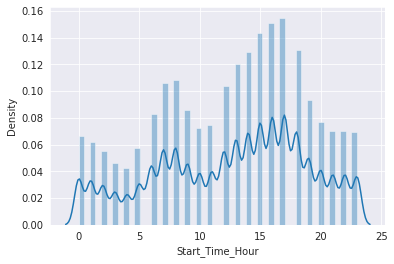

In [45]:
# from the previous line of code we can see that most of the accidents occurred around 5pm followed by 4pm and 3pm.
sns.distplot(df.Start_Time_Hour)
# the output from this plot shows us a very interesting trend for the time that accidents occurrs.
# we can see a steady growth in the time and a rapid decrease at the end. it shows that accidents was most frequent in the late afternoon to evening time. 

## i need to create additional columns from my Start Time to do further analysis in understanding the months and yearly trends for the accident occurrence

In [46]:
# first extract the days from the Start_Time column and create a new column called Start_Day
df["Start_Day"] = df.Start_Time.dt.day
df.Start_Day.head()

0    8
1    8
2    8
3    8
4    8
Name: Start_Day, dtype: int64

In [47]:
df.Start_Day.value_counts()

23    55903
12    54623
24    54602
30    54565
22    53388
13    52237
19    52196
18    52193
28    51851
20    51543
11    51219
21    51034
29    50888
17    50733
10    50708
25    49999
16    49764
14    49447
26    49408
9     49007
27    48310
7     47869
8     47586
15    46656
6     46626
3     44700
1     44565
2     42777
5     41317
4     39014
31    31336
Name: Start_Day, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


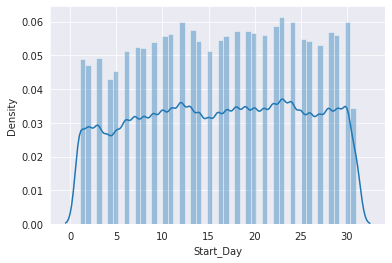

In [48]:
sns.distplot(df.Start_Day)

In [49]:
df["Start_Month"] = df.Start_Time.dt.month
monthly_accidents = df.Start_Month.value_counts()
monthly_accidents

12    277489
11    222031
10    181074
9     122906
6     113048
5     108195
4     107007
3      96802
1      88540
2      82419
8      62903
7      53650
Name: Start_Month, dtype: int64

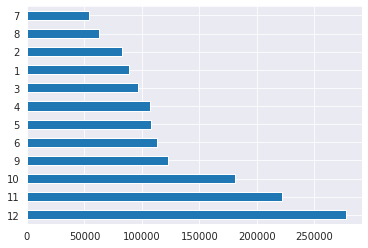

In [50]:
df.Start_Month.value_counts().plot(kind = "barh")
# from the result of this output, it is clear that december has the highest number of accidents.
# also, we see a trend in months. it's as if the accidents starts increasing from march and peaks at december.

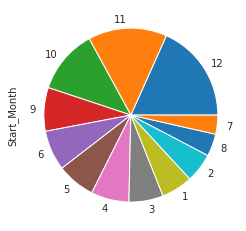

In [51]:
df.Start_Month.value_counts().plot(kind= "pie")

In [52]:
df.Start_Month.value_counts().tail(3)

2    82419
8    62903
7    53650
Name: Start_Month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


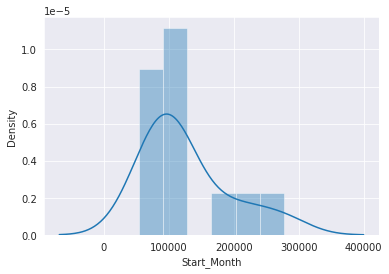

In [53]:
sns.distplot(df.Start_Month.value_counts())

In [54]:
from matplotlib import pyplot as plt

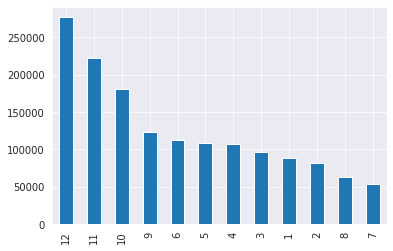

In [55]:
monthly_accidents.plot.bar()

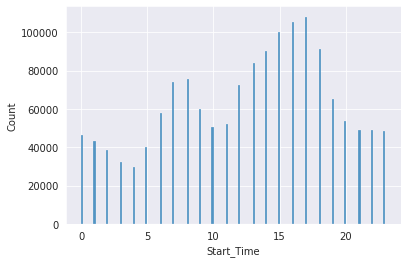

In [56]:
# suppose we want to ask what hour of the day has the most accident
sns.histplot(df.Start_Time.dt.hour)

In [57]:
# also i might be interested in what day of the week had the most accidents.
# monday is 0 sunday is 6.
df.Start_Time.dt.dayofweek.value_counts()

3    258036
2    255775
4    254127
1    250900
0    235831
5    137620
6    123775
Name: Start_Time, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


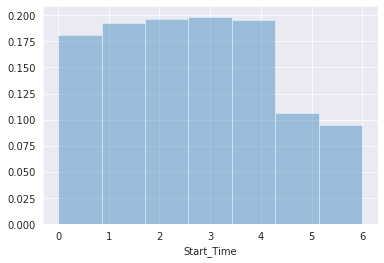

In [58]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde= False, norm_hist=True)

Also i might ask, what's the distribution of accidents relative to time for weekdays relative to weekends.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


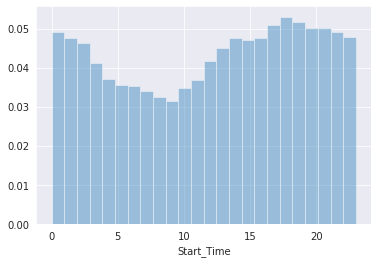

In [59]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_start_time.dt.hour,kde=False,bins=24, norm_hist= True)
# from the output it is obvious that most of the accidents also occurr during afternoon as on weekdays. 

In [60]:
# suppose i want to find for mondays. the time that has most accidents occurrence.
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


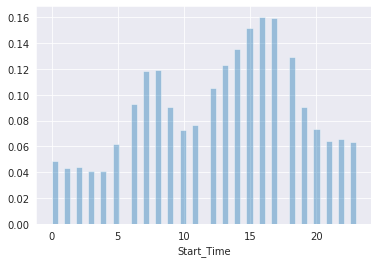

In [61]:
sns.distplot(monday_start_time.dt.hour, kde = False, norm_hist = True)
# there's definitely a different trend for sundays and mondays.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


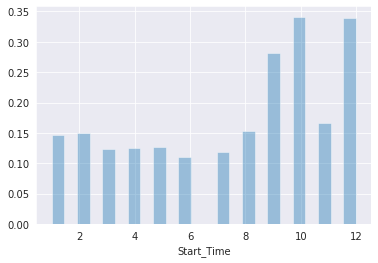

In [62]:
# also let's drill deeper into what happened in a particular year. say 2019
accidents_in_2019 =df[ df.Start_Time.dt.year == 2019]
sns.distplot(accidents_in_2019.Start_Time.dt.month, kde=False,bins=24,norm_hist=True)

### Start_Lat and Start_Lng

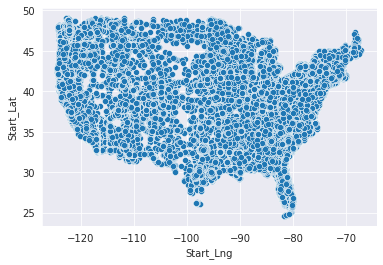

In [63]:
sns.scatterplot(x= df.Start_Lng,y=df.Start_Lat)

In [64]:
import folium

In [65]:
for x in df[["Start_Lat","Start_Lng"]].sample(100).iteritems():
  print(x)

('Start_Lat', 447840     25.946316
107755     40.750800
95084      39.836703
1429316    39.976652
472355     32.679614
             ...    
1196437    41.908150
842703     27.955620
1160020    33.614851
597144     33.947528
224050     33.659731
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 447840     -80.148619
107755     -73.897410
95084      -75.154287
1429316    -83.121571
472355     -86.926683
              ...    
1196437    -87.662430
842703     -82.500130
1160020   -117.707571
597144    -118.279699
224050    -117.901149
Name: Start_Lng, Length: 100, dtype: float64)


In [72]:
from folium.plugins import HeatMap

In [81]:
sample_df = df.sample(int(0.01*len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [82]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Weather condition

In [66]:
len(df["Weather_Condition"].value_counts())
# what i have done here is to check how many unique weather conditions we have in our dataset.
# the output happens to show us 116 unique weather conditions.

116

In [67]:
# suppos i just wanted to find out the top 10 weather conditions that had most accidents occurring there.
df["Weather_Condition"].value_counts().head(10)

Fair                465252
Mostly Cloudy       193595
Clear               180223
Cloudy              161291
Partly Cloudy       133102
Overcast             87853
Light Rain           72511
Scattered Clouds     47061
Light Snow           22113
Fog                  19777
Name: Weather_Condition, dtype: int64

## Precipitation(in)

In [68]:
df["Precipitation(in)"].value_counts()

0.00     903429
0.01      29157
0.02      14377
0.03       9895
0.04       7419
          ...  
1.41          1
9.65          1
10.05         1
9.79          1
1.14          1
Name: Precipitation(in), Length: 187, dtype: int64

## Ask and Answer questions about the dataset
1. Are there more accidents in warmer or colder areas?
2. Which state(s) has the highest number of accidents? how about per capita
3. i might want to ask are there more accidents in cities with much population?
4. Why does CA have such a high number of accidents that far exceeds even     Florida that is second?
5. i might also want to ask which cities or states has the least amount of accidents
6. what time of the day are accidents more frequent?
7. which days of the week has the most accidents?
8. which months has the most accidents?
9. what is the trend of accidents for each year?


## summary and conclusion
Insights:
1. 49 States and 10658 cities surveyed.
2. 97.64% of the cities have accidents less than 1000 throughout that period. This means that even though we have some cities with a high number of accidensts, most of them fall below 100 which is 97.64%
3. The number of accidents per city follows an exponential decay
4. october,november and december were the 3 months that had the highest accidents. it showed an increase in accidents for the second part of the year.
5. from the analysis, we can see that most of the accidents occurred between the hours of 3pm to 6pm. 
6. the second highest occurred between  5am to 9am. 
7. Mondays through Fridays have the hightest accidents in terms of days of the week,with thursdays being the highest.We can also see a decrease in the amount of accidents recorded on weekends. the least happens to be on Sunday. 

In [69]:
!pip install jovian --upgrade --quiet

In [70]:
import jovian

In [83]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accident-data-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/adolph-eniang/us-accident-data-analysis


'https://jovian.ai/adolph-eniang/us-accident-data-analysis'